In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import sympy

## 1. Получите и загрузите данные.

In [ ]:
df_test_titanic = pd.read_csv('test.csv')

In [ ]:
df_train_titanic = pd.read_csv('train.csv')

In [ ]:
print(df_train_titanic.shape)
df_train_titanic.head(3)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
print(df_test_titanic.shape)
df_test_titanic.head(3)

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


## 2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.

In [ ]:
dict_null = {}
for col in df_train_titanic.columns:
  dict_null.setdefault(col, df_train_titanic[col].isnull().sum())
print(f'Пропуски: {dict_null}')

Пропуски: {'PassengerId': 0, 'Survived': 0, 'Pclass': 0, 'Name': 0, 'Sex': 0, 'Age': 177, 'SibSp': 0, 'Parch': 0, 'Ticket': 0, 'Fare': 0, 'Cabin': 687, 'Embarked': 2}


In [ ]:
del df_train_titanic['Cabin'] # у столбца много пропусков. Столбец удален полностью

In [ ]:
df_train_titanic.dropna(inplace=True) # удаление строк с пропусками

In [ ]:
df_train_titanic.drop(labels=['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True) # удаление категор.перемен.

In [ ]:
X = df_train_titanic.drop(['Survived'], axis=1) # Формирование признаков

In [ ]:
Y = df_train_titanic['Survived'] # Формирование целевого признака.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1982, stratify=Y)

In [ ]:
model_log = LogisticRegression()

In [ ]:
model_log.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_predict = model_log.predict(x_test)

### ОЦЕНКА МОДЕЛИ

In [ ]:
print(f'Accuracy на обуч. выборке: {model_log.score(x_train, y_train)}')
print(f'Accuracy на тестовой выборке: {model_log.score(x_test, y_test)}') # metrics.accuracy_score(y_test, y_predict)
print(f'TPR: {metrics.recall_score(y_test, y_predict)}')
print(f'precision: {metrics.precision_score(y_test, y_predict)}')

Accuracy на обуч. выборке: 0.7293497363796133
Accuracy на тестовой выборке: 0.6293706293706294
TPR: 0.41379310344827586
precision: 0.5581395348837209


In [ ]:
# Модель плохо предсказывает выживших, низкий recall, модель плохо классифицирует 1 класс
classification_report = metrics.classification_report(y_test, y_predict)
print(f'Отчёт классификации:\n {classification_report}')

Отчёт классификации:
               precision    recall  f1-score   support

           0       0.66      0.78      0.71        85
           1       0.56      0.41      0.48        58

    accuracy                           0.63       143
   macro avg       0.61      0.60      0.59       143
weighted avg       0.62      0.63      0.62       143



Погибшие: 85
Выжившие: 58


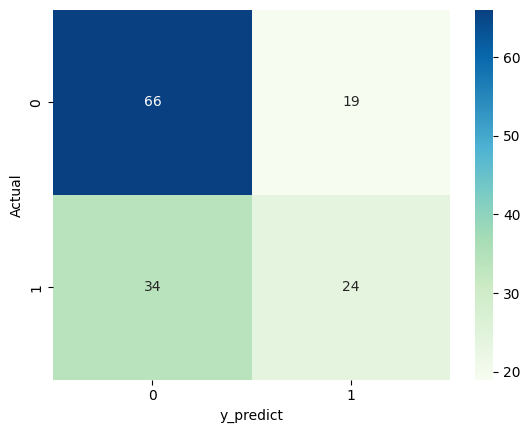

In [ ]:
print(f'Погибшие: {y_test.value_counts()[0]}')
print(f'Выжившие: {y_test.value_counts()[1]}')
CM = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(CM, annot=True, fmt='', cmap='GnBu')
plt.ylabel('Actual')
plt.xlabel('y_predict');

In [ ]:
predict = model_log.predict_proba(x_test)
fpr, tpr, tresh = metrics.roc_curve(y_test, predict[:,1])

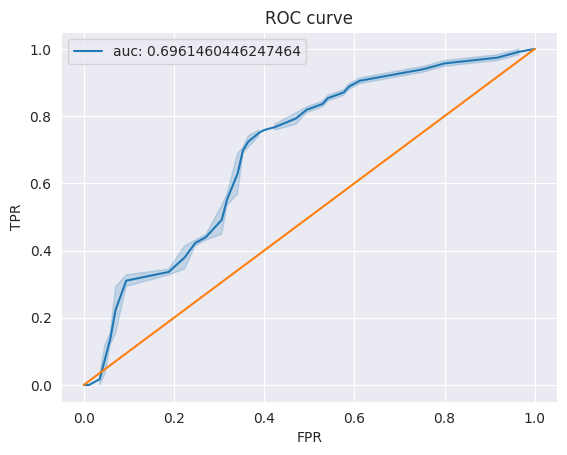

In [ ]:
sns.set_style('darkgrid')
sns.lineplot(x=fpr, y=tpr, label=(f'auc: {metrics.auc(fpr, tpr)}'))
sns.lineplot(x=np.linspace(0, 1, 10), y=np.linspace(0, 1, 10))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR');

## 3. Снова загрузите полные данные.

In [ ]:
df_train_titanic = pd.read_csv('train.csv')
df_train_titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## 4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.

In [ ]:
# Признаки, которые считаю можно удалить: Имя пассажира и Id пассажира
df_train_titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
# Число уникальных билетов - 681, число уникальных номеров кают - 147 при 891 пассажиров.
print(df_train_titanic.shape)
df_train_titanic[['Ticket', 'Cabin']].nunique()

(891, 12)


,0
Ticket,681
Cabin,147


In [ ]:
# 103 пассажира у которых число кают 2 и более.
print(len(df_train_titanic.loc[df_train_titanic.groupby(['Cabin']).transform('size')>1]))

# Среди пассажиров которые имеют несколько номеров кают есть пассажиры 3 и 2 классов.
df_train_titanic.loc[(df_train_titanic.groupby(['Cabin']).transform('size')>1) & (df_train_titanic['Pclass']==3)]

# Данный признак ПОКА ОСТАВЛЯЮ

103


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S
751,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S
823,824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,E121,S


In [ ]:
print(df_train_titanic[['PassengerId', 'Name', 'Ticket']].nunique())
# Признаки, которые считаю можно удалить: Имя пассажира и Id пассажира, номер билета т.к много уникальных значений
columns_del=['PassengerId', 'Name', 'Ticket']

PassengerId    891
Name           891
Ticket         681
dtype: int64


In [ ]:
# Удаление ненужных столбцов
df_train_titanic.drop(labels=columns_del, axis=1, inplace=True)

In [ ]:
df_train_titanic.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S


## 5. Проверьте данные на наличие пропущенных значений.

In [ ]:
# a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски. Четыре из 5 зяписей потеря данных. Это огромное число

In [ ]:
count_=len(df_train_titanic)
count_dpropna=len(df_train_titanic.dropna())
print(f'Всего данных: {count_}')
print(f'Число данных после удаления пустот: {count_dpropna}')
print(f'Процент утерянных данных: {1-(count_dpropna/count_):.2%}')

Всего данных: 891
Число данных после удаления пустот: 183
Процент утерянных данных: 79.46%


In [ ]:
# b) Заполните пропуски:

In [ ]:
df_train_titanic.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S


In [ ]:
# Огромное количество пропусков у признака "номер кабины" - 687 пропусков из 891 записей что составляет ~ 77,1% пропущенных значений
# Считаю данный признак так же можно удалить.
# Пустоты у признаки 'Age', 'Embarked' заполню.
df_train_titanic[['Cabin', 'Age', 'Embarked']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Cabin     204 non-null    object 
 1   Age       714 non-null    float64
 2   Embarked  889 non-null    object 
dtypes: float64(1), object(2)
memory usage: 21.0+ KB


In [ ]:
del df_train_titanic['Cabin'] # Очень много пустот. Удаляю признак.

### Анализ признака возраст

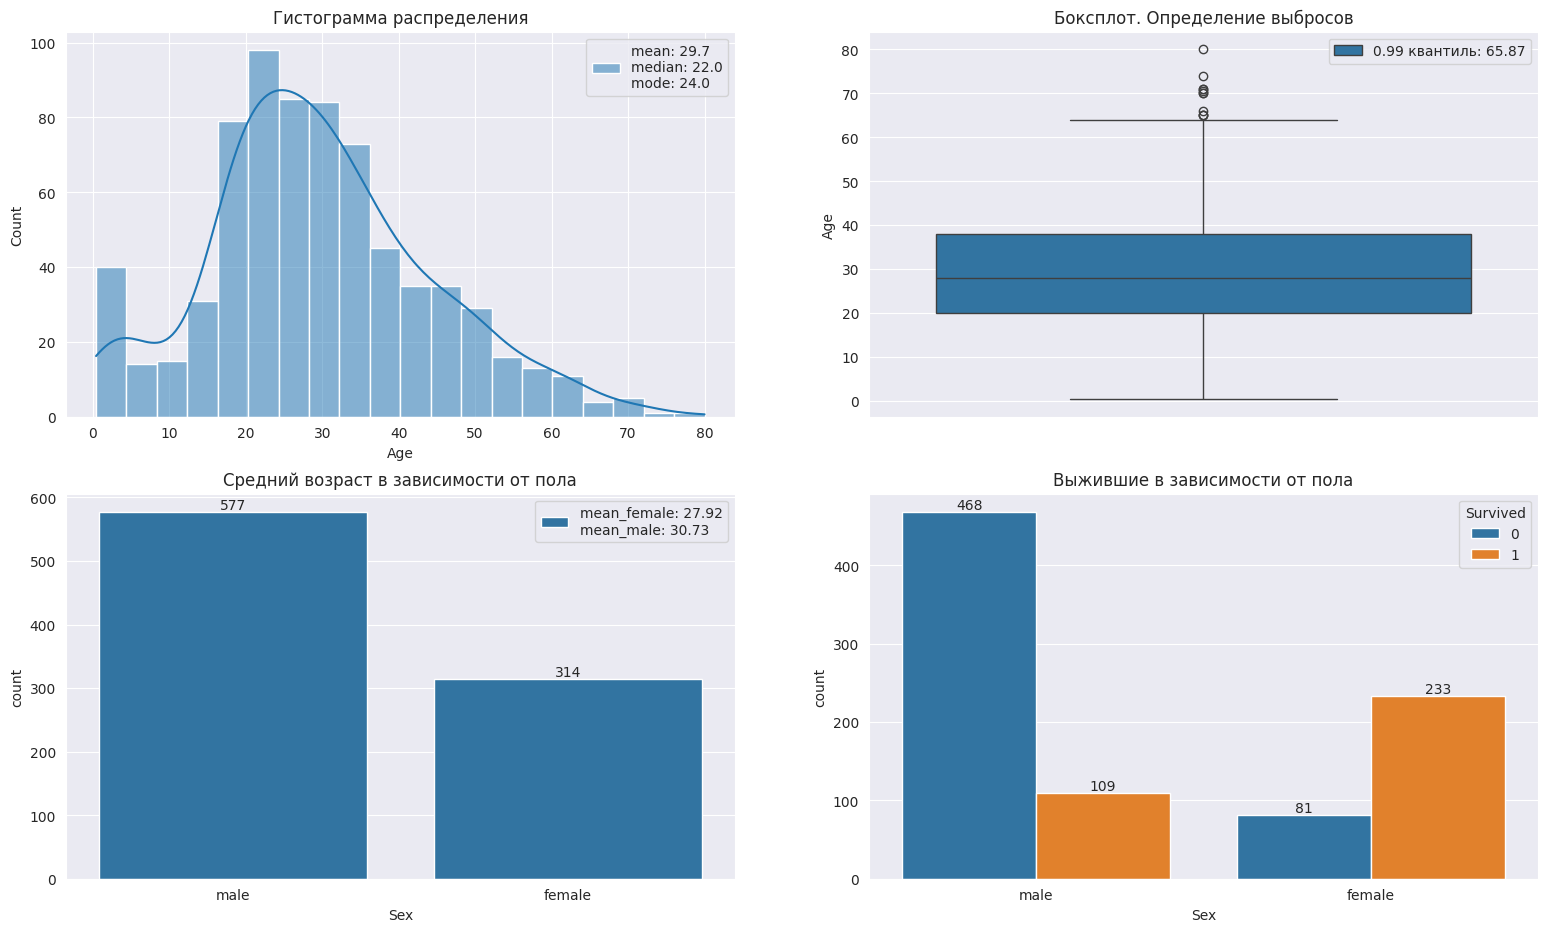

In [ ]:
# Анализ признака возраст
mean_ = round(df_train_titanic['Age'].mean(), 2)
median_=np.median(df_train_titanic['Age'][0])
mode_=round(df_train_titanic['Age'].mode()[0], 2)
quantile_=df_train_titanic['Age'].quantile(0.99)
female_ = round(df_train_titanic.groupby('Sex')['Age'].mean().values[0], 2)
male_ = round(df_train_titanic.groupby('Sex')['Age'].mean().values[1], 2)

plt.figure(figsize=(19, 11))
plt.subplot(2, 2, 1)
plt.title('Гистограмма распределения')
sns.histplot(df_train_titanic['Age'], kde=True, label=f'mean: {mean_}\nmedian: {median_}\nmode: {mode_}')
plt.legend()
plt.subplot(2, 2, 2)
plt.title('Боксплот. Определение выбросов')
sns.boxplot(df_train_titanic['Age'], label=f'0.99 квантиль: {quantile_}')
plt.legend()
plt.subplot(2, 2, 3)
plt.title('Средний возраст в зависимости от пола')
chart = sns.countplot(data=df_train_titanic, x='Sex', label=f'mean_female: {female_}\nmean_male: {male_}')
chart.bar_label(chart.containers[0])
plt.subplot(2, 2, 4)
plt.title('Выжившие в зависимости от пола')
chart=sns.countplot(data=df_train_titanic, x='Sex', hue='Survived')
chart.bar_label(chart.containers[0])
chart.bar_label(chart.containers[1]);

In [ ]:
# Показатели среднего возраста в зависимости от пола, класса пассажира и выживаемости
print(df_train_titanic.groupby(['Survived', 'Sex', 'Pclass'])['Age'].mean())

Survived  Sex     Pclass
0         female  1         25.666667
                  2         36.000000
                  3         23.818182
          male    1         44.581967
                  2         33.369048
                  3         27.255814
1         female  1         34.939024
                  2         28.080882
                  3         19.329787
          male    1         36.248000
                  2         16.022000
                  3         22.274211
Name: Age, dtype: float64


In [ ]:
# Показатели медианы в зависимости от пола, класса пассажира и выживаемости
#1) Среди женщин первого класса погибли более молодые - 25 лет, выжившие женщины 1 класса - 35 лет
#2) Из второго и третьего классов выжили более молодые женщины
#3) Из первого класса погибли более возрастные мужчины - 45,5. Выжившие из первого класса - 36 лет
#4) Из 3 класса медианный возраст погибших и выживших одинаковый, если средний возраст то погибли чуть более возрастные - 27 лет против 22!
print(df_train_titanic.groupby(['Survived', 'Sex', 'Pclass'])['Age'].median())

Survived  Sex     Pclass
0         female  1         25.0
                  2         32.5
                  3         22.0
          male    1         45.5
                  2         30.5
                  3         25.0
1         female  1         35.0
                  2         28.0
                  3         19.0
          male    1         36.0
                  2          3.0
                  3         25.0
Name: Age, dtype: float64


In [ ]:
#Заполню пустоты средним значением в зависимости от пола, класса пассажира и выживаемости
df_train_titanic['Age']=df_train_titanic['Age'].fillna(df_train_titanic.groupby(['Survived', 'Sex', 'Pclass'])['Age'].transform('mean'))

### Анализ признака Embarked

In [ ]:
# C = Cherbourg, Q = Queenstown, S = Southampton
# Анализ признака Embarked/ Пропущенные данные
print(df_train_titanic.loc[df_train_titanic['Embarked'].isnull()])

     Survived  Pclass     Sex   Age  SibSp  Parch  Fare Embarked
61          1       1  female  38.0      0      0  80.0      NaN
829         1       1  female  62.0      0      0  80.0      NaN


In [ ]:
print(df_train_titanic.groupby('Embarked').agg({'Fare': ('min', 'max', 'mean', 'median')}))

            Fare                            
             min       max       mean median
Embarked                                    
C         4.0125  512.3292  59.954144  29.70
Q         6.7500   90.0000  13.276030   7.75
S         0.0000  263.0000  27.079812  13.00


In [ ]:
print(df_train_titanic.groupby('Pclass').agg({'Fare': ('min', 'max', 'mean', 'median')}))

       Fare                              
        min       max       mean   median
Pclass                                   
1       0.0  512.3292  84.154687  60.2875
2       0.0   73.5000  20.662183  14.2500
3       0.0   69.5500  13.675550   8.0500


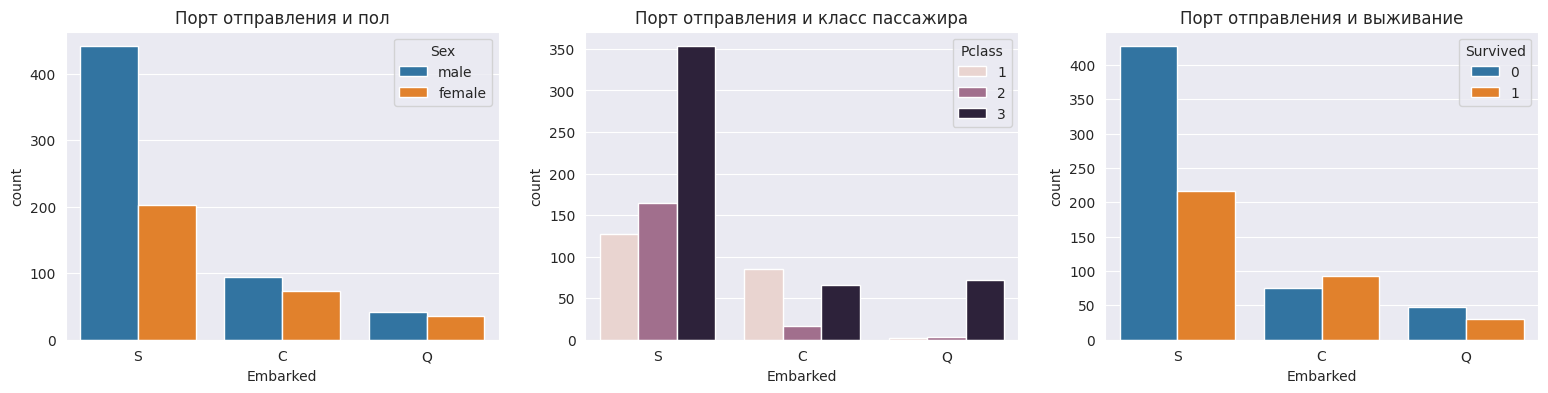

In [ ]:
plt.figure(figsize=(19,4))
plt.subplot(1,3,1)
plt.title('Порт отправления и пол')
sns.countplot(data=df_train_titanic, x='Embarked', hue='Sex')
plt.subplot(1,3,2)
plt.title('Порт отправления и класс пассажира')
sns.countplot(data=df_train_titanic, x='Embarked', hue='Pclass')
plt.subplot(1,3,3)
plt.title('Порт отправления и выживание')
sns.countplot(data=df_train_titanic, x='Embarked', hue='Survived');

In [ ]:
# У пропущенных значениях пассажиры: женщины, 1 класса, выжившие. Анализируя графики можно предположить что порт отправления является - S = Southampton

In [ ]:
#Заполню пустоты
df_train_titanic['Embarked']=df_train_titanic['Embarked'].fillna('S')

In [ ]:
# Пустоты все заполнены
df_train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## 6. Категориальные переменные переведите в цифровые значения.

In [ ]:
df_train_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# Преобразование признака - Пол
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_train_titanic['Sex']=LE.fit_transform(df_train_titanic['Sex'])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Преобразование признака - Embarked
ONE = OneHotEncoder(dtype='int', sparse_output=False)
Embarked_hot = ONE.fit_transform(df_train_titanic[['Embarked']])

In [ ]:
ONE.get_feature_names_out()

array(['Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype=object)

In [ ]:
df_Embarked_hot=pd.DataFrame(data=Embarked_hot, columns=ONE.get_feature_names_out())

In [ ]:
df_train_titanic = df_train_titanic.join(df_Embarked_hot, how='inner').drop(labels='Embarked', axis=1)

In [ ]:
df_train_titanic.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1


## 7. Проверьте данные на наличие выбросов.

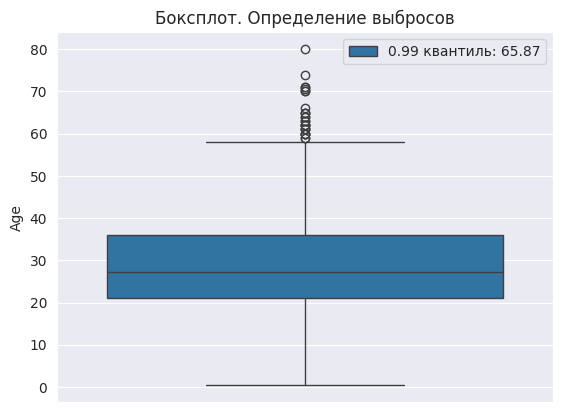

In [ ]:
# Подробно разобрал в 5 пункте. Выбросы не удалял. Дети грудного возраста и пассажиры старше 65 лет допустимый возраст, не аномальные данные.
plt.title('Боксплот. Определение выбросов')
sns.boxplot(df_train_titanic['Age'], label=f'0.99 квантиль: {quantile_}')
plt.legend();

## 8. Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

In [ ]:
# Подробные графики разобрал в 5 ПУНКТЕ при анализе признаков

## 9. Попробуйте математически преобразовать признак Age.

In [ ]:
df_train_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [ ]:
# Преобразовал признак - Age методом "ручной" стандартизацией
df_train_titanic['Age']=df_train_titanic['Age'].apply(lambda x: (x - df_train_titanic['Age'].mean())/df_train_titanic['Age'].std())

In [ ]:
df_train_titanic.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,-0.548928,1,0,7.2500,0,0,1
1,1,1,0,0.647757,1,0,71.2833,1,0,0
2,1,3,0,-0.249757,0,0,7.9250,0,0,1


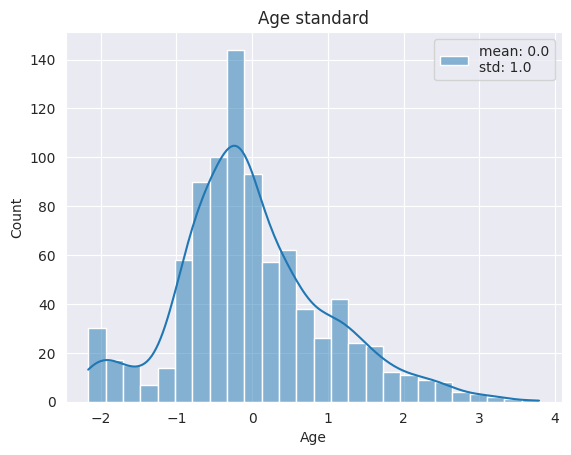

In [ ]:
mean_stand_age = round(np.mean(df_train_titanic['Age']), 2)
std_stand_age = round(np.std(df_train_titanic['Age']), 2)
sns.histplot(data=df_train_titanic, x='Age', kde=True, label= f'mean: {mean_stand_age}\nstd: {std_stand_age}')
plt.title('Age standard')
plt.legend();

## 10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# признак Fare так же стандартизирую
Standart = StandardScaler()

In [ ]:
fare_standard = Standart.fit_transform(df_train_titanic[['Fare']])

In [ ]:
df_fare_standard=pd.DataFrame(data=fare_standard, columns=['fare_standard'])

In [ ]:
df_train_titanic=df_train_titanic.join(df_fare_standard, how='inner').drop(labels='Fare', axis=1)

In [ ]:
df_train_titanic.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,fare_standard
0,0,3,1,-0.548928,1,0,0,0,1,-0.502445


In [ ]:
X2=df_train_titanic.drop(labels='Survived', axis=1)

In [ ]:
Y2=df_train_titanic['Survived']

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=1982, stratify=Y2)

In [ ]:
model_log_2=LogisticRegression(class_weight='balanced')#class_weight='balanced'

In [ ]:
model_log_2.fit(x_train2, y_train2)

LogisticRegression(class_weight='balanced')

###  Оценка модели после преобразований данных

In [ ]:
y_predict_2=model_log_2.predict(x_test2)

In [ ]:
classification_report_2 = metrics.classification_report(y_test2, y_predict_2)
print(classification_report_2)

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       110
           1       0.74      0.81      0.77        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



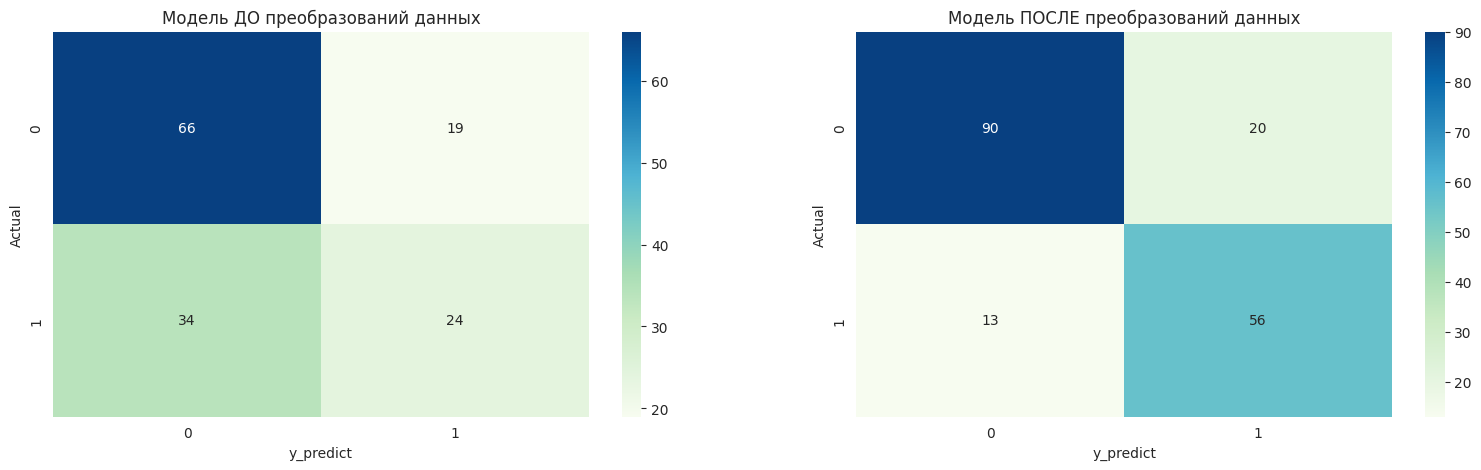

In [ ]:
plt.figure(figsize=(19, 5))
CM = metrics.confusion_matrix(y_test, y_predict)
plt.subplot(1,2,1)
sns.heatmap(CM, annot=True, fmt='', cmap='GnBu')
plt.title('Модель ДО преобразований данных')
plt.ylabel('Actual')
plt.xlabel('y_predict');

plt.subplot(1,2,2)
CM_2=metrics.confusion_matrix(y_test2, y_predict_2)
sns.heatmap(CM_2, annot=True, fmt='', cmap='GnBu')
plt.title('Модель ПОСЛЕ преобразований данных')
plt.ylabel('Actual')
plt.xlabel('y_predict');

In [ ]:
predict_2 = model_log_2.predict_proba(x_test2)

In [ ]:
# Веса каждого признака
print(X2.columns)
model_log_2.coef_

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'fare_standard'],
      dtype='object')


array([[-1.25372896, -2.56287488, -0.66841953, -0.32020089, -0.05998295,
         0.11268469,  0.05139523, -0.16079083,  0.02962897]])

In [ ]:
fpr_2, tpr_2, treshold = metrics.roc_curve(y_test2, predict_2[:,1])

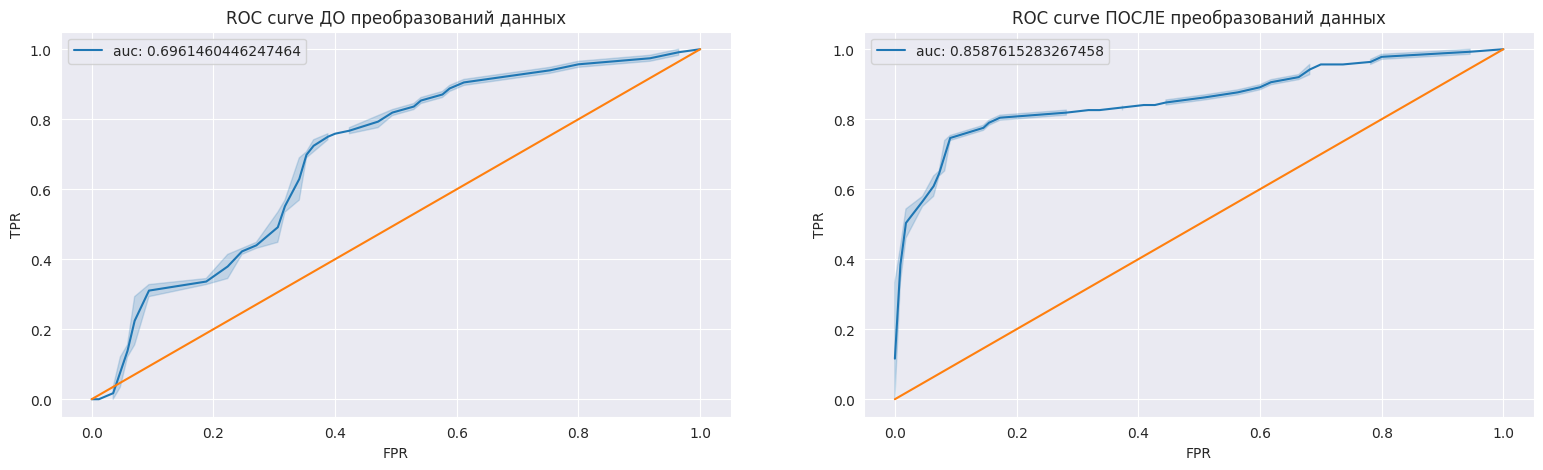

In [ ]:
plt.figure(figsize=(19, 5))
plt.subplot(1,2,1)
sns.lineplot(x=fpr, y=tpr, label=(f'auc: {metrics.auc(fpr, tpr)}'))
sns.lineplot(x=np.linspace(0, 1, 10), y=np.linspace(0, 1, 10))
plt.title('ROC curve ДО преобразований данных')
plt.xlabel('FPR')
plt.ylabel('TPR');

plt.subplot(1,2,2)
sns.lineplot(x=fpr_2, y=tpr_2, label=(f'auc: {metrics.auc(fpr_2, tpr_2)}'))
sns.lineplot(x=np.linspace(0, 1, 10), y=np.linspace(0, 1, 10))
plt.title('ROC curve ПОСЛЕ преобразований данных')
plt.xlabel('FPR')
plt.ylabel('TPR');

## 11. Сформулируйте выводы по проделанной работе.

In [ ]:
df_info = pd.DataFrame({'class': [0, 0, 1, 1], 'precision': [0.66, 0.87, 0.56, 0.74], 'recall': [0.78, 0.82, 0.41, 0.81], 'auc': [0.7, 0.86, 0.7, 0.86]}, index=['ДО', 'ПОСЛЕ', 'ДО', 'ПОСЛЕ'])

In [ ]:
# a) Кратко опишите какие преобразования были сделаны и почему
"""
Заполнены постот с сохранением хороших данных, удалены как мне показались не нужные признаки, некоторые признаки стандартизованы. Вес признака - fare оказался незначительным ~ 0.03
"""

'\nЗаполнены постот с сохранением хороших данных, удалены как мне показались не нужные признаки, некоторые признаки стандартизованы. Вес признака - fare оказался незначительным ~ 0.03\n'

In [ ]:
# b) Сравните метрики моделей из п. 2 и п. 10.
"""
Вторая модель получилось лучше. Модель лучше стала предсказывать и находить целевой признак - Survived. Особенно увеличилась способность находить,
определять 1 класс (спасенных категорий пассажиров). 1 классом у первой модели очень низкий recall (TPR) - 0,41 против 0,81 у второй модели.
FPR у первой модели: 0.22 (19/(19+66))
FPR у второй модели: 0.19 (20/(20+90)) что на 13,64% ниже чем у первой модели
"""
print(df_info)

       class  precision  recall   auc
ДО         0       0.66    0.78  0.70
ПОСЛЕ      0       0.87    0.82  0.86
ДО         1       0.56    0.41  0.70
ПОСЛЕ      1       0.74    0.81  0.86


In [ ]:
# c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения.
"""
Оценка признаков, их преобразование, заполнение пустот с целью сохранения нужных "хороших" данных  повышает качество модели.
"""

'\nОценка признаков, их преобразование, заполнение пустот с целью сохранения нужных "хороших" данных  повышает качество модели. \n'

In [ ]:
# *Нужно ли аналогичным образом исследовать и дополнять действительно большие данные?
"""
spark. По всей видимости преобразование big данных для качества модели имеет большое значение. Возможно данные преобразовываются на этапах их получения.
"""

'\nspark. По всей видимости преобразование big данных для качества модели имеет большое значение. Возможно данные преобразовываются на этапах их получения.  \n'